## FINK & VAST Crossmatches

This notebook is for reading in and grouping the crossmatched FINK and VAST sources into families, as well as some basic statistics on the variety of sources found in the crossmatch. The bulk of this code is used at the start of any analysis notebook, for example 'VAST Source Query & Analysis'.

The family groupings you see in this notebook may vary from others, but the principle of how the grouping is done is here for a refference. 

In [1]:
import os
import requests
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reads in the .pickle file. the full filepath needs to be specified if its not in the same directory as this notebook
cmf = pd.read_pickle('Fink_2020_sources_matched_to_VAST_all_sources.pickle')
cmf

,objectId,matched_id,class,cdsxmatch,ra,dec
0,ZTF18abrbtnv,4019632,Galaxy,Galaxy,26.554485,-5.867615
1,ZTF18abtjmuc,3800801,Seyfert_1,Seyfert_1,312.923125,0.859951
2,ZTF18abwwswg,3183786,QSO,QSO,356.166843,-0.542217
3,ZTF18acalcri,4141677,Unknown,Unknown,37.878373,-4.689744
4,ZTF18aceaess,4143573,Blue,Blue,61.881376,-7.701111
...,...,...,...,...,...,...
1767,ZTF20acizueo,3518638,Unknown,Unknown,2.516641,-8.206982
1768,ZTF20ackaxrr,3609606,Solar System MPC,Unknown,356.686993,-6.351142
1769,ZTF20acpcmmy,3595707,LINER,LINER,339.171540,0.042716
1770,ZTF20acpdwqq,4005890,AGN,AGN,59.176970,-8.399412


next, we take the list of unique class identifiers from the 'class' column and organise them into different 'families':

In [3]:
#Each variable represents a family group. here which class belongs in which group is specified here.
AGN_Family=[
'AGN',
'AGN_Candidate',
'QSO',
'QSO_Candidate',
'Seyfert',
'Seyfert_1',
'Seyfert_2',
'Blazar',
'BLLac',
'Blazar_Candidate',
'RadioG',
'LINER'
]

Unknown_Family=[
'Unknown'
]

Galaxy_Family=[
'Galaxy',
'EmG',
'HII_G',
'GroupG',
'GinGroup',
'GinCl',
'GinPair',
'BClG',
'PartofG'
]

Stars_Family=[
'Star',
'RRLyr',
'Candidate_RRLyr',
'EB*',
'Candidate_EB*',
'WD*',
'LMXB',
'CataclyV*',
'low-mass*'
]

Supernovae_Family=[
'SN',
'SN candidate'
]

Spectral_Family=[
'Radio',
'Radio(cm)', #split into radio and non radio/multiwavelength

'Blue',
'UV',
'X'
]

Solar_System_Family=[
'Solar System',
'Solar System MPC',
'Solar System candidate',
]

Next, we need to create a new column, where for each crossmatched source, we write the appropriate family classification depending on the objects identified class

In [4]:
Source_Families=[] #define an empty array
for i, row in cmf.iterrows(): #'i' represents the first index in cmf.iterrows, 'row' is the second
    x=row['class'] #this pulls out the class column from eachrow
    for j in AGN_Family: #for all the classes listed in the AGN family
        if x==j: #if it matches the class of the row
            Source_Families.append('AGN') #add 'AGN' to the empty array
    else: #otherwise, check the other families to see if it matches
        for j in Unknown_Family:
            if x==j:
                Source_Families.append('Unknown')
        else:
            for j in Galaxy_Family:
                if x==j:
                    Source_Families.append('Galaxy')
            else:
                for j in Stars_Family:
                    if x==j:
                        Source_Families.append('Star')
                else:
                    for j in Supernovae_Family:
                        if x==j:
                            Source_Families.append('Supernova')
                    else:
                        for j in Spectral_Family:
                            if x==j:
                                Source_Families.append('Spectral')
                        else:
                            for j in Solar_System_Family:
                                if x==j:
                                    Source_Families.append('Other')
                                    
#at the end, we add a new column to cmf called 'family', which is equal in length and with the same elements as Source_Families:
cmf['family']=Source_Families

In [5]:
cmf

,objectId,matched_id,class,cdsxmatch,ra,dec,family
0,ZTF18abrbtnv,4019632,Galaxy,Galaxy,26.554485,-5.867615,Galaxy
1,ZTF18abtjmuc,3800801,Seyfert_1,Seyfert_1,312.923125,0.859951,AGN
2,ZTF18abwwswg,3183786,QSO,QSO,356.166843,-0.542217,AGN
3,ZTF18acalcri,4141677,Unknown,Unknown,37.878373,-4.689744,Unknown
4,ZTF18aceaess,4143573,Blue,Blue,61.881376,-7.701111,Spectral
...,...,...,...,...,...,...,...
1767,ZTF20acizueo,3518638,Unknown,Unknown,2.516641,-8.206982,Unknown
1768,ZTF20ackaxrr,3609606,Solar System MPC,Unknown,356.686993,-6.351142,Other
1769,ZTF20acpcmmy,3595707,LINER,LINER,339.171540,0.042716,AGN
1770,ZTF20acpdwqq,4005890,AGN,AGN,59.176970,-8.399412,AGN


here we see that cmf has been updated with a new column, where each object has been assigned to a family that lines up with the dependant class

In [6]:
#groups each row in cmfby family, prints each groupings size, and lists that from largest to smallest
print(cmf.groupby('family').size().sort_values(ascending=False))

family
AGN          827
Unknown      516
Galaxy       167
Spectral     109
Other         81
Supernova     51
Star          21
dtype: int64


We can now get a basic idea of what kind of sources we're looking at. Two notes here:

1. 'Unknown' just means that ZTF wasn't able to identify the class of the source. Its not necessarily an indication of a brand new type of source, as it could be an AGN, SUpernova, etc. That was just failed to be identified.

2. The 'Galaxy' family and its respective classes is more a description of the variable sources environment than the source itself. You COULD have a variable galaxy, but thats not guranteed by the classification.

<AxesSubplot:ylabel='None'>

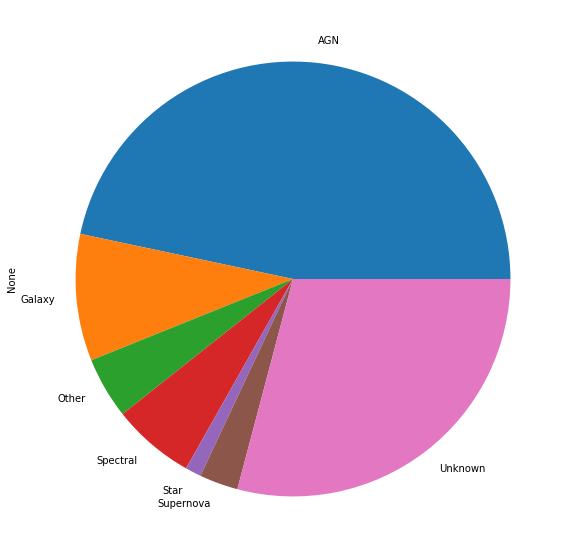

In [7]:
#represents the same grouping as a pie chart
cmf.groupby('family').size().plot.pie(figsize=(10,10))

from here, we can start to pull out subsets of our crossmatched list based on the family of the sources of interest. For example, we can pull out all sources in our crossmatch that fall under the 'AGN' family.

In [8]:
AGN_list=cmf.query('family == "AGN"')
AGN_list

,objectId,matched_id,class,cdsxmatch,ra,dec,family
1,ZTF18abtjmuc,3800801,Seyfert_1,Seyfert_1,312.923125,0.859951,AGN
2,ZTF18abwwswg,3183786,QSO,QSO,356.166843,-0.542217,AGN
6,ZTF18acvkdtz,3440328,QSO,QSO,218.815233,2.539290,AGN
8,ZTF18aczersz,3438778,QSO,QSO,202.003044,2.455322,AGN
12,ZTF19aainjyb,3465921,BLLac,BLLac,40.234092,-5.078465,AGN
...,...,...,...,...,...,...,...
1759,ZTF20acaraky,3796834,QSO,QSO,33.374515,-5.360879,AGN
1761,ZTF20acdcick,3321302,QSO,QSO,350.769231,-1.846684,AGN
1763,ZTF20acekiug,3727622,QSO,QSO,26.982498,-4.306445,AGN
1769,ZTF20acpcmmy,3595707,LINER,LINER,339.171540,0.042716,AGN


To reiterrate, depending on the family your're looking at, you arent guranteed to be looking at a uniform set of the same kind of source. 

## Crossmatched Sources Detection Histogram

The goal of this section will be to pull the measurements made by VAST (n:measurements) and FINK (n:detections) and make histograms for the ammount of measurements made per source. Im thinking I'll have to make 2 seperate histograms for Radio and Optical (Alternatively I could merge the measurement counts for both). The end goal will to make "sub histograms" that display the detection distribution for each fami